In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("kmeancluster.csv")

In [26]:
df

,GreenMango Length,GreenMangowidth,YelloMangoLength,YelloMangoWidth
0,10.2,10.5,5.6,0.6
1,9.8,9.0,5.6,0.6
2,9.4,9.6,5.2,0.6
3,9.2,9.3,6.0,0.6
4,10.0,10.8,5.6,0.6
...,...,...,...,...
146,12.6,7.5,20.0,5.7
147,13.0,9.0,20.8,6.0
148,12.4,10.2,21.6,6.9
149,11.8,9.0,20.4,5.4


Text(0, 0.5, 'width')

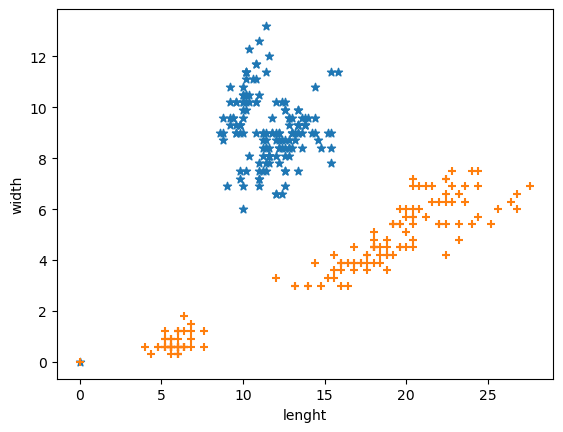

In [10]:
plt.scatter(df['GreenMango Length'] , df['GreenMangowidth'] , marker = "*" )
plt.scatter(df['YelloMangoLength'] , df['YelloMangoWidth'] , marker = "+" )
plt.xlabel("lenght")
plt.ylabel("width")

#  create k mean cluster 


In [12]:
from sklearn.cluster import KMeans

In [27]:
km = KMeans(n_clusters= 3)
y_predicted = km.fit_predict(df[['GreenMango Length' , 'GreenMangowidth', 'YelloMangoLength', 'YelloMangoWidth']])

H:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
df['cluster'] = y_predicted

In [29]:
df

,GreenMango Length,GreenMangowidth,YelloMangoLength,YelloMangoWidth,cluster
0,10.2,10.5,5.6,0.6,1
1,9.8,9.0,5.6,0.6,1
2,9.4,9.6,5.2,0.6,1
3,9.2,9.3,6.0,0.6,1
4,10.0,10.8,5.6,0.6,1
...,...,...,...,...,...
146,12.6,7.5,20.0,5.7,0
147,13.0,9.0,20.8,6.0,2
148,12.4,10.2,21.6,6.9,2
149,11.8,9.0,20.4,5.4,0


In [55]:
df1=df.drop(['GreenMango Length','GreenMangowidth'] , axis = 'columns')

In [56]:
df1


,YelloMangoLength,YelloMangoWidth,cluster
0,5.6,0.6,1
1,5.6,0.6,1
2,5.2,0.6,1
3,6.0,0.6,1
4,5.6,0.6,1
...,...,...,...
146,20.0,5.7,0
147,20.8,6.0,2
148,21.6,6.9,2
149,20.4,5.4,0


In [57]:
km.cluster_centers_

array([[11.86349206,  8.27142857, 17.6       ,  4.27142857],
       [ 9.81568627, 10.05294118,  5.74117647,  0.71764706],
       [13.64864865,  9.2027027 , 23.07027027,  6.31621622]])

In [58]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

Text(0, 0.5, 'width')

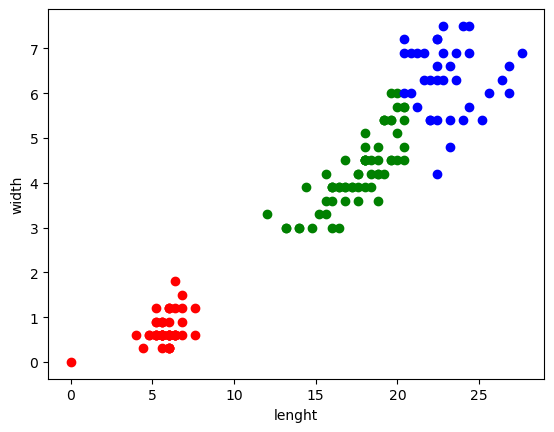

In [59]:
plt.scatter(df1['YelloMangoLength'], df1['YelloMangoWidth'] ,color = "green")
plt.scatter(df2['YelloMangoLength'], df2['YelloMangoWidth'] ,color = "red")
plt.scatter(df3['YelloMangoLength'], df3['YelloMangoWidth'] ,color = "blue")
plt.xlabel("lenght")
plt.ylabel('width')

# elbow chart for finding number of cluster

In [65]:
# finding sum square error
sse=[]
k_cluster = range(1,9)
for i in k_cluster:
    km = KMeans(n_clusters =i)
    km.fit(df[['YelloMangoLength' , 'YelloMangoWidth']])
    sse.append(km.inertia_)

H:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
H:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

In [66]:
sse

[8440.227152317879,
 1286.4328535353536,
 490.4757468977931,
 300.1812929703014,
 223.62248173650738,
 176.18320505102628,
 142.03755799220272,
 114.2442023809524]

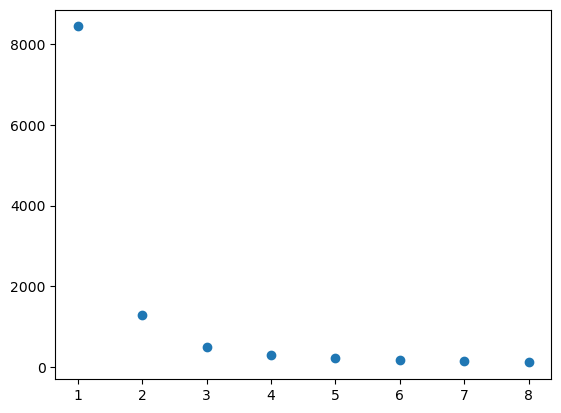

In [71]:
plt.scatter(k_cluster ,sse)